In [1]:
!pip install pulp

### 필요 모듈 로드

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from scipy import sparse

%matplotlib inline

### 인접행렬 정의

In [3]:
row0 =[0,1,1,0,0,0,0,0,1,0,0,0,0]
row1 =[1,0,1,1,1,0,0,0,0,0,0,0,0]
row2 =[1,1,0,1,1,0,0,0,0,0,0,0,0]
row3 =[0,1,1,0,1,0,0,0,0,0,0,0,0]
row4 =[0,1,1,1,0,0,0,0,0,1,0,0,0]
row5 =[0,0,0,0,0,0,1,1,0,0,0,0,0]
row6 =[0,0,0,0,0,1,0,1,0,0,0,0,0]
row7 =[0,0,0,0,0,1,1,0,0,0,1,1,1]
row8 =[1,0,0,0,0,0,0,0,0,0,0,0,0]
row9 =[0,0,0,0,1,0,0,0,0,0,0,0,0]
row10=[0,0,0,0,0,0,0,1,0,0,0,0,0]
row11=[0,0,0,0,0,0,0,1,0,0,0,0,0]
row12=[0,0,0,0,0,0,0,1,0,0,0,0,0]

adj_matrix = np.matrix([row0,row1,row2,row3,row4,row5,row6,row7,row8,row9,row10,row11,row12])
adj_sparse = sp.sparse.coo_matrix(adj_matrix, dtype=np.int8)
labels = range(1,len(row1)+1)
DF_adj = pd.DataFrame(adj_sparse.toarray(),index=labels,columns=labels)

정의된 인접행렬

In [4]:
print(DF_adj)

    1   2   3   4   5   6   7   8   9   10  11  12  13
1    0   1   1   0   0   0   0   0   1   0   0   0   0
2    1   0   1   1   1   0   0   0   0   0   0   0   0
3    1   1   0   1   1   0   0   0   0   0   0   0   0
4    0   1   1   0   1   0   0   0   0   0   0   0   0
5    0   1   1   1   0   0   0   0   0   1   0   0   0
6    0   0   0   0   0   0   1   1   0   0   0   0   0
7    0   0   0   0   0   1   0   1   0   0   0   0   0
8    0   0   0   0   0   1   1   0   0   0   1   1   1
9    1   0   0   0   0   0   0   0   0   0   0   0   0
10   0   0   0   0   1   0   0   0   0   0   0   0   0
11   0   0   0   0   0   0   0   1   0   0   0   0   0
12   0   0   0   0   0   0   0   1   0   0   0   0   0
13   0   0   0   0   0   0   0   1   0   0   0   0   0


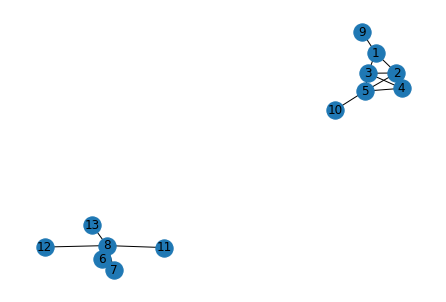

In [5]:
G = nx.Graph()
G.add_nodes_from(labels)

for i in range(DF_adj.shape[0]):
    col_label = DF_adj.columns[i]
    for j in range(DF_adj.shape[1]):
        row_label = DF_adj.index[j]
        node = DF_adj.iloc[i,j]
        if node == 1:
            G.add_edge(col_label,row_label)
nx.draw(G,with_labels = True)

DF_re = pd.DataFrame(np.zeros([len(G.nodes()),len(G.nodes())]),index=G.nodes(),columns=G.nodes())
for col_label,row_label in G.edges():
    DF_re.loc[col_label,row_label] = 1
    DF_re.loc[row_label,col_label] = 1

### Minimum Vertex Cover 함수 정의

In [6]:
def greedy_vc(input_graph):
    cover = []
    valid, num_edge = valid_cover(input_graph, cover)
    
    while not valid:
        m = [x for x in range(0, len(num_edge)) if num_edge[x] == max(num_edge)][0]
        cover.append(m)
        valid, num_edge = valid_cover(input_graph, cover)
        
    return cover

def valid_cover(graph, cover):
    valid = True
    num_edge = [0] * len(graph)
    for i in range(0, len(graph)):
        for j in range(i, len(graph)):
            if graph[i][j] == 1:
                if (i not in cover) and (j not in cover):
                    valid = False
                    num_edge[i] += 1
                    num_edge[j] += 1
    return valid, num_edge

def Minimum_vertex(M):
    graph = M.A
    cover = greedy_vc(graph)
    print(cover)


### 최종 입지 도출

In [7]:
Minimum_vertex(adj_matrix)

[7, 1, 2, 4, 0, 5]
